In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# we are going with the last decade 2010 through 2020

filepath2 = "hatecrimes_2010_2020.csv"

In [3]:
# read in dataset into pandas
df2 = pd.read_csv(filepath2)

df2.info()

C:\Users\jonwukeme\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219073 entries, 0 to 219072
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   INCIDENT_ID               219073 non-null  int64  
 1   DATA_YEAR                 219073 non-null  int64  
 2   ORI                       219073 non-null  object 
 3   PUB_AGENCY_NAME           219073 non-null  object 
 4   PUB_AGENCY_UNIT           6427 non-null    object 
 5   AGENCY_TYPE_NAME          219073 non-null  object 
 6   STATE_ABBR                219073 non-null  object 
 7   STATE_NAME                219073 non-null  object 
 8   DIVISION_NAME             219073 non-null  object 
 9   REGION_NAME               219073 non-null  object 
 10  POPULATION_GROUP_CODE     219073 non-null  object 
 11  POPULATION_GROUP_DESC     219073 non-null  object 
 12  INCIDENT_DATE             219073 non-null  object 
 13  ADULT_VICTIM_COUNT        50907 non-null   f

In [4]:
# retrieve the columns in the dataset
df2.columns

Index(['INCIDENT_ID', 'DATA_YEAR', 'ORI', 'PUB_AGENCY_NAME', 'PUB_AGENCY_UNIT',
       'AGENCY_TYPE_NAME', 'STATE_ABBR', 'STATE_NAME', 'DIVISION_NAME',
       'REGION_NAME', 'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC',
       'INCIDENT_DATE', 'ADULT_VICTIM_COUNT', 'JUVENILE_VICTIM_COUNT',
       'TOTAL_OFFENDER_COUNT', 'ADULT_OFFENDER_COUNT',
       'JUVENILE_OFFENDER_COUNT', 'OFFENDER_RACE', 'OFFENDER_ETHNICITY',
       'VICTIM_COUNT', 'OFFENSE_NAME', 'TOTAL_INDIVIDUAL_VICTIMS',
       'LOCATION_NAME', 'BIAS_DESC', 'VICTIM_TYPES', 'MULTIPLE_OFFENSE',
       'MULTIPLE_BIAS'],
      dtype='object')

In [13]:
# create a dataset with the columns selected
cols = ["DATA_YEAR","STATE_ABBR","STATE_NAME","REGION_NAME","POPULATION_GROUP_DESC","INCIDENT_DATE","OFFENDER_RACE","VICTIM_COUNT","OFFENSE_NAME","LOCATION_NAME","BIAS_DESC","VICTIM_TYPES"]
proj_df = df2.loc[:, cols]
proj_df

,DATA_YEAR,STATE_ABBR,STATE_NAME,REGION_NAME,POPULATION_GROUP_DESC,INCIDENT_DATE,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES
0,1991,AR,Arkansas,South,"Cities from 10,000 thru 24,999",31-AUG-91,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual
1,1991,AR,Arkansas,South,"Cities from 2,500 thru 9,999",19-SEP-91,Black or African American,1,Simple Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual
2,1991,AR,Arkansas,South,"Cities from 50,000 thru 99,999",04-JUL-91,Black or African American,1,Aggravated Assault,Residence/Home,Anti-Black or African American,Individual
3,1991,AR,Arkansas,South,"Cities from 50,000 thru 99,999",24-DEC-91,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual
4,1991,AR,Arkansas,South,"Cities from 50,000 thru 99,999",23-DEC-91,Black or African American,1,Aggravated Assault,Service/Gas Station,Anti-White,Individual
...,...,...,...,...,...,...,...,...,...,...,...,...
219068,2020,WY,Wyoming,West,"Cities from 10,000 thru 24,999",29-NOV-20,White,2,Intimidation,Park/Playground,"Anti-Lesbian, Gay, Bisexual, or Transgender (M...",Individual
219069,2020,WY,Wyoming,West,"Cities from 10,000 thru 24,999",14-JUL-20,Unknown,1,Destruction/Damage/Vandalism of Property,Park/Playground,Anti-White,Government
219070,2020,WY,Wyoming,West,"Cities from 10,000 thru 24,999",16-OCT-20,Black or African American,1,Aggravated Assault,Residence/Home,Anti-White,Individual
219071,2020,WY,Wyoming,West,"Cities from 10,000 thru 24,999",30-JAN-20,White,1,Simple Assault,Residence/Home,Anti-Female,Individual


In [15]:
# filter for DATA_YEAR greater than 2010
mask = (proj_df["DATA_YEAR"] >= 2010)
projyr_df = proj_df.loc[mask, :]
projyr_df

,DATA_YEAR,STATE_ABBR,STATE_NAME,REGION_NAME,POPULATION_GROUP_DESC,INCIDENT_DATE,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES
143578,2010,AK,Alaska,West,"Cities from 250,000 thru 499,999",14-JUL-10,White,2,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual
143579,2010,AK,Alaska,West,"Cities from 250,000 thru 499,999",14-JUL-10,Black or African American,1,Simple Assault,Jail/Prison/Penitentiary/Corrections Facility,Anti-Gay (Male),Individual
143580,2010,AK,Alaska,West,"Cities from 250,000 thru 499,999",17-SEP-10,American Indian or Alaska Native,2,Simple Assault,Liquor Store,Anti-White,Individual
143581,2010,AK,Alaska,West,"Cities from 250,000 thru 499,999",21-SEP-10,American Indian or Alaska Native,1,Aggravated Assault,Residence/Home,Anti-White,Individual
143582,2010,AK,Alaska,West,"Cities from 250,000 thru 499,999",01-OCT-10,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-Islamic (Muslim),Individual
...,...,...,...,...,...,...,...,...,...,...,...,...
219068,2020,WY,Wyoming,West,"Cities from 10,000 thru 24,999",29-NOV-20,White,2,Intimidation,Park/Playground,"Anti-Lesbian, Gay, Bisexual, or Transgender (M...",Individual
219069,2020,WY,Wyoming,West,"Cities from 10,000 thru 24,999",14-JUL-20,Unknown,1,Destruction/Damage/Vandalism of Property,Park/Playground,Anti-White,Government
219070,2020,WY,Wyoming,West,"Cities from 10,000 thru 24,999",16-OCT-20,Black or African American,1,Aggravated Assault,Residence/Home,Anti-White,Individual
219071,2020,WY,Wyoming,West,"Cities from 10,000 thru 24,999",30-JAN-20,White,1,Simple Assault,Residence/Home,Anti-Female,Individual


In [53]:
projyr_df.to_csv("Final_output.csv", index=False, header=True)

In [24]:
projyr_df["OFFENSE_NAME"].value_counts

<bound method IndexOpsMixin.value_counts of 143578                          Aggravated Assault
143579                              Simple Assault
143580                              Simple Assault
143581                          Aggravated Assault
143582                                Intimidation
                            ...                   
219068                                Intimidation
219069    Destruction/Damage/Vandalism of Property
219070                          Aggravated Assault
219071                              Simple Assault
219072                         Theft From Building
Name: OFFENSE_NAME, Length: 75495, dtype: object>

In [26]:
projyr_df["OFFENSE_NAME"].nunique()

265

In [27]:
# more focused definition of crimes
projyr_df['LOCATION_NAME'].str.split(";").str[0]

143578               Highway/Road/Alley/Street/Sidewalk
143579    Jail/Prison/Penitentiary/Corrections Facility
143580                                     Liquor Store
143581                                   Residence/Home
143582               Highway/Road/Alley/Street/Sidewalk
                              ...                      
219068                                  Park/Playground
219069                                  Park/Playground
219070                                   Residence/Home
219071                                   Residence/Home
219072                                   Residence/Home
Name: LOCATION_NAME, Length: 75495, dtype: object

In [28]:
projyr_df['LOCATION_NAME'].str.split(";").str[0].nunique()

46

In [38]:
projyr_df['LOCATION_NAME'].str.split(";").str[0]

143578               Highway/Road/Alley/Street/Sidewalk
143579    Jail/Prison/Penitentiary/Corrections Facility
143580                                     Liquor Store
143581                                   Residence/Home
143582               Highway/Road/Alley/Street/Sidewalk
                              ...                      
219068                                  Park/Playground
219069                                  Park/Playground
219070                                   Residence/Home
219071                                   Residence/Home
219072                                   Residence/Home
Name: LOCATION_NAME, Length: 75495, dtype: object

In [29]:
projyr_df['LOCATION_NAME'].str.split("/").str[0].nunique()

53

In [30]:
projyr_df['LOCATION_NAME'].str.split("/").str[0]

143578         Highway
143579            Jail
143580    Liquor Store
143581       Residence
143582         Highway
              ...     
219068            Park
219069            Park
219070       Residence
219071       Residence
219072       Residence
Name: LOCATION_NAME, Length: 75495, dtype: object

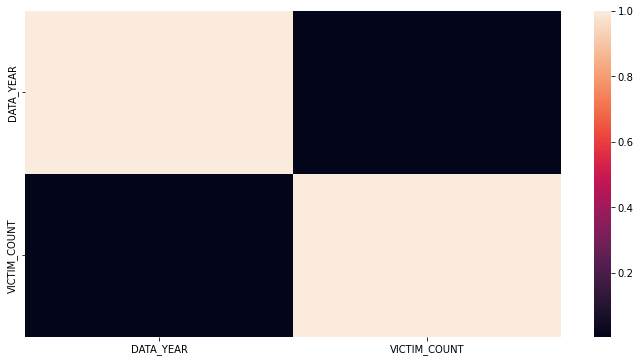

In [31]:
plt.figure(figsize=(12,6))
corrs=projyr_df.corr()

sns.heatmap(corrs)

plt.show()

In [34]:
projyr_df.columns

Index(['DATA_YEAR', 'STATE_ABBR', 'STATE_NAME', 'REGION_NAME',
       'POPULATION_GROUP_DESC', 'INCIDENT_DATE', 'OFFENDER_RACE',
       'VICTIM_COUNT', 'OFFENSE_NAME', 'LOCATION_NAME', 'BIAS_DESC',
       'VICTIM_TYPES'],
      dtype='object')

In [36]:
projyr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75495 entries, 143578 to 219072
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   DATA_YEAR              75495 non-null  int64 
 1   STATE_ABBR             75495 non-null  object
 2   STATE_NAME             75495 non-null  object
 3   REGION_NAME            75495 non-null  object
 4   POPULATION_GROUP_DESC  75495 non-null  object
 5   INCIDENT_DATE          75495 non-null  object
 6   OFFENDER_RACE          75475 non-null  object
 7   VICTIM_COUNT           75495 non-null  int64 
 8   OFFENSE_NAME           75495 non-null  object
 9   LOCATION_NAME          75495 non-null  object
 10  BIAS_DESC              75495 non-null  object
 11  VICTIM_TYPES           75495 non-null  object
dtypes: int64(2), object(10)
memory usage: 7.5+ MB


In [37]:
projyr_df.head()

,DATA_YEAR,STATE_ABBR,STATE_NAME,REGION_NAME,POPULATION_GROUP_DESC,INCIDENT_DATE,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES
143578,2010,AK,Alaska,West,"Cities from 250,000 thru 499,999",14-JUL-10,White,2,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual
143579,2010,AK,Alaska,West,"Cities from 250,000 thru 499,999",14-JUL-10,Black or African American,1,Simple Assault,Jail/Prison/Penitentiary/Corrections Facility,Anti-Gay (Male),Individual
143580,2010,AK,Alaska,West,"Cities from 250,000 thru 499,999",17-SEP-10,American Indian or Alaska Native,2,Simple Assault,Liquor Store,Anti-White,Individual
143581,2010,AK,Alaska,West,"Cities from 250,000 thru 499,999",21-SEP-10,American Indian or Alaska Native,1,Aggravated Assault,Residence/Home,Anti-White,Individual
143582,2010,AK,Alaska,West,"Cities from 250,000 thru 499,999",01-OCT-10,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-Islamic (Muslim),Individual


In [43]:
projyr_df['LOCATION_NAME_1(/)'] = projyr_df['LOCATION_NAME'].str.split("/").str[0]

C:\Users\JONWUK~1\AppData\Local\Temp/ipykernel_25068/710853610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  projyr_df['LOCATION_NAME_1(/)'] = projyr_df['LOCATION_NAME'].str.split("/").str[0]


In [44]:
projyr_df

,DATA_YEAR,STATE_ABBR,STATE_NAME,REGION_NAME,POPULATION_GROUP_DESC,INCIDENT_DATE,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,LOCATION_NAME_1,LOCATION_NAME_2,LOCATION_NAME_1(/)
143578,2010,AK,Alaska,West,"Cities from 250,000 thru 499,999",14-JUL-10,White,2,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,Highway,Highway/Road/Alley/Street/Sidewalk,Highway
143579,2010,AK,Alaska,West,"Cities from 250,000 thru 499,999",14-JUL-10,Black or African American,1,Simple Assault,Jail/Prison/Penitentiary/Corrections Facility,Anti-Gay (Male),Individual,Jail,Jail/Prison/Penitentiary/Corrections Facility,Jail
143580,2010,AK,Alaska,West,"Cities from 250,000 thru 499,999",17-SEP-10,American Indian or Alaska Native,2,Simple Assault,Liquor Store,Anti-White,Individual,Liquor Store,Liquor Store,Liquor Store
143581,2010,AK,Alaska,West,"Cities from 250,000 thru 499,999",21-SEP-10,American Indian or Alaska Native,1,Aggravated Assault,Residence/Home,Anti-White,Individual,Residence,Residence/Home,Residence
143582,2010,AK,Alaska,West,"Cities from 250,000 thru 499,999",01-OCT-10,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-Islamic (Muslim),Individual,Highway,Highway/Road/Alley/Street/Sidewalk,Highway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219068,2020,WY,Wyoming,West,"Cities from 10,000 thru 24,999",29-NOV-20,White,2,Intimidation,Park/Playground,"Anti-Lesbian, Gay, Bisexual, or Transgender (M...",Individual,Park,Park/Playground,Park
219069,2020,WY,Wyoming,West,"Cities from 10,000 thru 24,999",14-JUL-20,Unknown,1,Destruction/Damage/Vandalism of Property,Park/Playground,Anti-White,Government,Park,Park/Playground,Park
219070,2020,WY,Wyoming,West,"Cities from 10,000 thru 24,999",16-OCT-20,Black or African American,1,Aggravated Assault,Residence/Home,Anti-White,Individual,Residence,Residence/Home,Residence
219071,2020,WY,Wyoming,West,"Cities from 10,000 thru 24,999",30-JAN-20,White,1,Simple Assault,Residence/Home,Anti-Female,Individual,Residence,Residence/Home,Residence


In [45]:
projyr_df['LOCATION_NAME_2(;)'] = projyr_df['LOCATION_NAME'].str.split(";").str[0]

C:\Users\JONWUK~1\AppData\Local\Temp/ipykernel_25068/1169815715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  projyr_df['LOCATION_NAME_2(;)'] = projyr_df['LOCATION_NAME'].str.split(";").str[0]


In [46]:
projyr_df

,DATA_YEAR,STATE_ABBR,STATE_NAME,REGION_NAME,POPULATION_GROUP_DESC,INCIDENT_DATE,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,LOCATION_NAME_1,LOCATION_NAME_2,LOCATION_NAME_1(/),LOCATION_NAME_2(;)
143578,2010,AK,Alaska,West,"Cities from 250,000 thru 499,999",14-JUL-10,White,2,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,Highway,Highway/Road/Alley/Street/Sidewalk,Highway,Highway/Road/Alley/Street/Sidewalk
143579,2010,AK,Alaska,West,"Cities from 250,000 thru 499,999",14-JUL-10,Black or African American,1,Simple Assault,Jail/Prison/Penitentiary/Corrections Facility,Anti-Gay (Male),Individual,Jail,Jail/Prison/Penitentiary/Corrections Facility,Jail,Jail/Prison/Penitentiary/Corrections Facility
143580,2010,AK,Alaska,West,"Cities from 250,000 thru 499,999",17-SEP-10,American Indian or Alaska Native,2,Simple Assault,Liquor Store,Anti-White,Individual,Liquor Store,Liquor Store,Liquor Store,Liquor Store
143581,2010,AK,Alaska,West,"Cities from 250,000 thru 499,999",21-SEP-10,American Indian or Alaska Native,1,Aggravated Assault,Residence/Home,Anti-White,Individual,Residence,Residence/Home,Residence,Residence/Home
143582,2010,AK,Alaska,West,"Cities from 250,000 thru 499,999",01-OCT-10,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-Islamic (Muslim),Individual,Highway,Highway/Road/Alley/Street/Sidewalk,Highway,Highway/Road/Alley/Street/Sidewalk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219068,2020,WY,Wyoming,West,"Cities from 10,000 thru 24,999",29-NOV-20,White,2,Intimidation,Park/Playground,"Anti-Lesbian, Gay, Bisexual, or Transgender (M...",Individual,Park,Park/Playground,Park,Park/Playground
219069,2020,WY,Wyoming,West,"Cities from 10,000 thru 24,999",14-JUL-20,Unknown,1,Destruction/Damage/Vandalism of Property,Park/Playground,Anti-White,Government,Park,Park/Playground,Park,Park/Playground
219070,2020,WY,Wyoming,West,"Cities from 10,000 thru 24,999",16-OCT-20,Black or African American,1,Aggravated Assault,Residence/Home,Anti-White,Individual,Residence,Residence/Home,Residence,Residence/Home
219071,2020,WY,Wyoming,West,"Cities from 10,000 thru 24,999",30-JAN-20,White,1,Simple Assault,Residence/Home,Anti-Female,Individual,Residence,Residence/Home,Residence,Residence/Home


In [47]:
projyr_df.columns

Index(['DATA_YEAR', 'STATE_ABBR', 'STATE_NAME', 'REGION_NAME',
       'POPULATION_GROUP_DESC', 'INCIDENT_DATE', 'OFFENDER_RACE',
       'VICTIM_COUNT', 'OFFENSE_NAME', 'LOCATION_NAME', 'BIAS_DESC',
       'VICTIM_TYPES', 'LOCATION_NAME_1', 'LOCATION_NAME_2',
       'LOCATION_NAME_1(/)', 'LOCATION_NAME_2(;)'],
      dtype='object')

In [50]:
cols2 = ['DATA_YEAR', 'STATE_ABBR', 'STATE_NAME', 'REGION_NAME','POPULATION_GROUP_DESC', 'INCIDENT_DATE', 'OFFENDER_RACE','VICTIM_COUNT', 'OFFENSE_NAME', 'LOCATION_NAME','LOCATION_NAME_1(/)', 'LOCATION_NAME_2(;)','BIAS_DESC','VICTIM_TYPES']
projyr2_df = projyr_df.loc[:, cols2]
projyr2_df

,DATA_YEAR,STATE_ABBR,STATE_NAME,REGION_NAME,POPULATION_GROUP_DESC,INCIDENT_DATE,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,LOCATION_NAME_1(/),LOCATION_NAME_2(;),BIAS_DESC,VICTIM_TYPES
143578,2010,AK,Alaska,West,"Cities from 250,000 thru 499,999",14-JUL-10,White,2,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,Highway,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual
143579,2010,AK,Alaska,West,"Cities from 250,000 thru 499,999",14-JUL-10,Black or African American,1,Simple Assault,Jail/Prison/Penitentiary/Corrections Facility,Jail,Jail/Prison/Penitentiary/Corrections Facility,Anti-Gay (Male),Individual
143580,2010,AK,Alaska,West,"Cities from 250,000 thru 499,999",17-SEP-10,American Indian or Alaska Native,2,Simple Assault,Liquor Store,Liquor Store,Liquor Store,Anti-White,Individual
143581,2010,AK,Alaska,West,"Cities from 250,000 thru 499,999",21-SEP-10,American Indian or Alaska Native,1,Aggravated Assault,Residence/Home,Residence,Residence/Home,Anti-White,Individual
143582,2010,AK,Alaska,West,"Cities from 250,000 thru 499,999",01-OCT-10,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Highway,Highway/Road/Alley/Street/Sidewalk,Anti-Islamic (Muslim),Individual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219068,2020,WY,Wyoming,West,"Cities from 10,000 thru 24,999",29-NOV-20,White,2,Intimidation,Park/Playground,Park,Park/Playground,"Anti-Lesbian, Gay, Bisexual, or Transgender (M...",Individual
219069,2020,WY,Wyoming,West,"Cities from 10,000 thru 24,999",14-JUL-20,Unknown,1,Destruction/Damage/Vandalism of Property,Park/Playground,Park,Park/Playground,Anti-White,Government
219070,2020,WY,Wyoming,West,"Cities from 10,000 thru 24,999",16-OCT-20,Black or African American,1,Aggravated Assault,Residence/Home,Residence,Residence/Home,Anti-White,Individual
219071,2020,WY,Wyoming,West,"Cities from 10,000 thru 24,999",30-JAN-20,White,1,Simple Assault,Residence/Home,Residence,Residence/Home,Anti-Female,Individual


In [58]:
projyr2_df['OFFENSE_NAME_1(/)'] = projyr2_df['OFFENSE_NAME'].str.split("/").str[0]

In [59]:
projyr2_df['BIAS_DESC_1(/)'] = projyr2_df['BIAS_DESC'].str.split("/").str[0]

In [60]:
projyr2_df

,DATA_YEAR,STATE_ABBR,STATE_NAME,REGION_NAME,POPULATION_GROUP_DESC,INCIDENT_DATE,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,LOCATION_NAME_1(/),LOCATION_NAME_2(;),BIAS_DESC,VICTIM_TYPES,OFFENSE_NAME_1(/),BIAS_DESC_1(/)
143578,2010,AK,Alaska,West,"Cities from 250,000 thru 499,999",14-JUL-10,White,2,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,Highway,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,Aggravated Assault,Anti-Black or African American
143579,2010,AK,Alaska,West,"Cities from 250,000 thru 499,999",14-JUL-10,Black or African American,1,Simple Assault,Jail/Prison/Penitentiary/Corrections Facility,Jail,Jail/Prison/Penitentiary/Corrections Facility,Anti-Gay (Male),Individual,Simple Assault,Anti-Gay (Male)
143580,2010,AK,Alaska,West,"Cities from 250,000 thru 499,999",17-SEP-10,American Indian or Alaska Native,2,Simple Assault,Liquor Store,Liquor Store,Liquor Store,Anti-White,Individual,Simple Assault,Anti-White
143581,2010,AK,Alaska,West,"Cities from 250,000 thru 499,999",21-SEP-10,American Indian or Alaska Native,1,Aggravated Assault,Residence/Home,Residence,Residence/Home,Anti-White,Individual,Aggravated Assault,Anti-White
143582,2010,AK,Alaska,West,"Cities from 250,000 thru 499,999",01-OCT-10,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Highway,Highway/Road/Alley/Street/Sidewalk,Anti-Islamic (Muslim),Individual,Intimidation,Anti-Islamic (Muslim)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219068,2020,WY,Wyoming,West,"Cities from 10,000 thru 24,999",29-NOV-20,White,2,Intimidation,Park/Playground,Park,Park/Playground,"Anti-Lesbian, Gay, Bisexual, or Transgender (M...",Individual,Intimidation,"Anti-Lesbian, Gay, Bisexual, or Transgender (M..."
219069,2020,WY,Wyoming,West,"Cities from 10,000 thru 24,999",14-JUL-20,Unknown,1,Destruction/Damage/Vandalism of Property,Park/Playground,Park,Park/Playground,Anti-White,Government,Destruction,Anti-White
219070,2020,WY,Wyoming,West,"Cities from 10,000 thru 24,999",16-OCT-20,Black or African American,1,Aggravated Assault,Residence/Home,Residence,Residence/Home,Anti-White,Individual,Aggravated Assault,Anti-White
219071,2020,WY,Wyoming,West,"Cities from 10,000 thru 24,999",30-JAN-20,White,1,Simple Assault,Residence/Home,Residence,Residence/Home,Anti-Female,Individual,Simple Assault,Anti-Female


In [62]:
projyr2_df.columns

Index(['DATA_YEAR', 'STATE_ABBR', 'STATE_NAME', 'REGION_NAME',
       'POPULATION_GROUP_DESC', 'INCIDENT_DATE', 'OFFENDER_RACE',
       'VICTIM_COUNT', 'OFFENSE_NAME', 'LOCATION_NAME', 'LOCATION_NAME_1(/)',
       'LOCATION_NAME_2(;)', 'BIAS_DESC', 'VICTIM_TYPES', 'OFFENSE_NAME_1(/)',
       'BIAS_DESC_1(/)'],
      dtype='object')

In [63]:
cols2 = ['DATA_YEAR', 'STATE_ABBR', 'STATE_NAME', 'REGION_NAME','POPULATION_GROUP_DESC', 'INCIDENT_DATE', 'OFFENDER_RACE','VICTIM_COUNT', 'OFFENSE_NAME', 'OFFENSE_NAME_1(/)', 'LOCATION_NAME','LOCATION_NAME_1(/)', 'LOCATION_NAME_2(;)','BIAS_DESC','BIAS_DESC_1(/)','VICTIM_TYPES']
projyr2_df = projyr_df.loc[:, cols2]
projyr2_df

,DATA_YEAR,STATE_ABBR,STATE_NAME,REGION_NAME,POPULATION_GROUP_DESC,INCIDENT_DATE,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,OFFENSE_NAME_1(/),LOCATION_NAME,LOCATION_NAME_1(/),LOCATION_NAME_2(;),BIAS_DESC,BIAS_DESC_1(/),VICTIM_TYPES
143578,2010,AK,Alaska,West,"Cities from 250,000 thru 499,999",14-JUL-10,White,2,Aggravated Assault,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,Highway,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Anti-Black or African American,Individual
143579,2010,AK,Alaska,West,"Cities from 250,000 thru 499,999",14-JUL-10,Black or African American,1,Simple Assault,Simple Assault,Jail/Prison/Penitentiary/Corrections Facility,Jail,Jail/Prison/Penitentiary/Corrections Facility,Anti-Gay (Male),Anti-Gay (Male),Individual
143580,2010,AK,Alaska,West,"Cities from 250,000 thru 499,999",17-SEP-10,American Indian or Alaska Native,2,Simple Assault,Simple Assault,Liquor Store,Liquor Store,Liquor Store,Anti-White,Anti-White,Individual
143581,2010,AK,Alaska,West,"Cities from 250,000 thru 499,999",21-SEP-10,American Indian or Alaska Native,1,Aggravated Assault,Aggravated Assault,Residence/Home,Residence,Residence/Home,Anti-White,Anti-White,Individual
143582,2010,AK,Alaska,West,"Cities from 250,000 thru 499,999",01-OCT-10,White,1,Intimidation,Intimidation,Highway/Road/Alley/Street/Sidewalk,Highway,Highway/Road/Alley/Street/Sidewalk,Anti-Islamic (Muslim),Anti-Islamic (Muslim),Individual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219068,2020,WY,Wyoming,West,"Cities from 10,000 thru 24,999",29-NOV-20,White,2,Intimidation,Intimidation,Park/Playground,Park,Park/Playground,"Anti-Lesbian, Gay, Bisexual, or Transgender (M...","Anti-Lesbian, Gay, Bisexual, or Transgender (M...",Individual
219069,2020,WY,Wyoming,West,"Cities from 10,000 thru 24,999",14-JUL-20,Unknown,1,Destruction/Damage/Vandalism of Property,Destruction,Park/Playground,Park,Park/Playground,Anti-White,Anti-White,Government
219070,2020,WY,Wyoming,West,"Cities from 10,000 thru 24,999",16-OCT-20,Black or African American,1,Aggravated Assault,Aggravated Assault,Residence/Home,Residence,Residence/Home,Anti-White,Anti-White,Individual
219071,2020,WY,Wyoming,West,"Cities from 10,000 thru 24,999",30-JAN-20,White,1,Simple Assault,Simple Assault,Residence/Home,Residence,Residence/Home,Anti-Female,Anti-Female,Individual


In [64]:
projyr2_df.to_csv("Final_output2.csv", index=False, header=True)

In [65]:
projyr2_df['BIAS_DESC_1(;)'] = projyr2_df['BIAS_DESC'].str.split(";").str[0]

In [66]:
projyr2_df['OFFENSE_NAME_1(;)'] = projyr2_df['OFFENSE_NAME'].str.split(";").str[0]

In [ ]:
cols2 = ['DATA_YEAR', 'STATE_ABBR', 'STATE_NAME', 'REGION_NAME','POPULATION_GROUP_DESC', 'INCIDENT_DATE', 'OFFENDER_RACE','VICTIM_COUNT', 'OFFENSE_NAME', 'OFFENSE_NAME_1(/)', 'LOCATION_NAME','LOCATION_NAME_1(/)', 'LOCATION_NAME_2(;)','BIAS_DESC','BIAS_DESC_1(;)','VICTIM_TYPES']
projyr2_df = projyr_df.loc[:, cols2]
projyr2_df